# Swindon Earnings

This script was written to provide easy interpretation of earning statistics for Swindon. It has been initialised to load the data available [here](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/methodologies/annualsurveyofhoursandearningslowpayandannualsurveyofhoursandearningspensionresultsqmi) The link allows an excel file to be downloaded.

Further to the earnings data, labour force data from the annual population survey is also extracted from Nomis [here](https://www.nomisweb.co.uk/) including the occupation and economic activity.

I make no claim that this script is overly efficient, it was made for personal interest.

Any questions please contact:
> Andrew Paul Barnes<br>
> Doctoral Student & Teaching Assistant<br>
> Department of Architecture and Civil Engineering<br>
> University of Bath<br>
> a.p.barnes@bath.ac.uk

## Libraries

To begin several libraries are imported to allow easy manipulation of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import linregress
from matplotlib.lines import Line2D

## Loading Data Required

First we load the data from the file indicated by the *EARNINGS_FILE*, *OCCUPATION_FILE* and *ACTIVITY_FILE* variables.

In [2]:
EARNINGS_FILE = "2019.csv"
OCCUPTAION_FILE = "occupation.csv"
ACTIVITY_FILE = "activity.csv"

In [3]:
earnings_data = pd.read_csv(EARNINGS_FILE, delimiter=',')
occupation_data = pd.read_csv(OCCUPTAION_FILE, delimiter=',')
activity_data = pd.read_csv(ACTIVITY_FILE, delimiter=',')

In [4]:
earnings_data

,Geography,AveragesAndPercentiles,Sex,WorkingPattern,HoursAndEarnings,Year,Figure
0,Swindon,Mean,All,All,Annual pay - Gross,2019,29584.00
1,Swindon,Mean,All,All,Hourly pay - Gross,2019,16.49
2,Swindon,Mean,All,All,Paid hours worked - Basic,2019,33.40
3,Swindon,Mean,All,All,Paid hours worked - Overtime,2019,1.10
4,Swindon,Mean,All,All,Paid hours worked - Total,2019,34.50
...,...,...,...,...,...,...,...
643,Swindon,Median,Male,Part-Time,Hourly pay - Gross,2014,7.72
644,Swindon,Median,Male,Part-Time,Paid hours worked - Basic,2014,18.40
645,Swindon,Median,Male,Part-Time,Paid hours worked - Overtime,2014,NaN
646,Swindon,Median,Male,Part-Time,Paid hours worked - Total,2014,19.40


## Overview

To begin we look at the annual earnings for both full and part-time employees through time.

In [ ]:
fig, all_axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

colours = ["#FFFFFF", "#007991", "#D56F3E"]
bar_width = 0.5
bars = []

for yidx, year in enumerate(activity_data['Year'].unique()):
    year_data = activity_data.loc[activity_data['Year'] == year]
    bot = 0
    bars = []
    for gidx, gender in enumerate(["All"]):
        gend_data = year_data.loc[year_data['Gender'] == gender]
        val = int(
            gend_data.loc[gend_data['Type'] == "Unemployed"][['number']].iloc[0][0].replace(',', '')
        )
        bars.append(all_axs.bar(
            int(year),
            val,
            color=colours[gidx],
            width=bar_width,
            bottom=bot,
            label=gender,
            edgecolor=colours[gidx] if colours[gidx] != 'w' else 'k',
            linewidth=1
        ))
        bot = bot + val
        
all_axs.set_xticks([2004, 2007, 2010, 2013, 2016, 2019])
all_axs.set_xticklabels([2004, 2007, 2010, 2013, 2016, 2019], fontsize=16, fontweight='bold')
all_axs.set_yticks(np.arange(0, 10001, 2500))
all_axs.set_yticklabels(np.arange(0, 10001, 2500), fontsize=16, fontweight='bold')
#all_axs.set_title("Unemployed", fontsize=12)
all_axs.set_ylabel("No. Unemployed People", color='w', fontsize=16, fontweight='bold')
all_axs.set_xlabel("Year", color='w', fontsize=16, fontweight='bold')
all_axs.set_ylim([1, 10000])


#all_axs.legend(bars, activity_data['Gender'].unique()[1:], fontsize=14)
plt.tight_layout()

all_axs.set_facecolor("#604D53")
all_axs.spines['right'].set_color("#FFFFFF")
all_axs.spines['top'].set_color("#FFFFFF")
all_axs.spines['bottom'].set_color("#FFFFFF")
all_axs.spines['left'].set_color("#FFFFFF")
all_axs.spines['right'].set_linewidth(0)
all_axs.spines['top'].set_linewidth(0)
all_axs.spines['bottom'].set_linewidth(5)
all_axs.spines['left'].set_linewidth(5)
all_axs.tick_params(axis='x', colors='#FFFFFF', width=5)
all_axs.tick_params(axis='y', colors='#FFFFFF', width=5)

In [114]:
earnings_data.loc[
        (
            earnings_data['Sex'] == "All"
        ) & (
            earnings_data['HoursAndEarnings'] == "Annual pay - Gross"
        ) & (
            earnings_data['Geography'] == "Swindon"
        ) & (
            earnings_data['AveragesAndPercentiles'] == "Mean"
        ) & (
            earnings_data['WorkingPattern'] == "Part-Time"
        )
    ] 

,Geography,AveragesAndPercentiles,Sex,WorkingPattern,HoursAndEarnings,Year,Figure
12,Swindon,Mean,All,Part-Time,Annual pay - Gross,2019,11675.0
120,Swindon,Mean,All,Part-Time,Annual pay - Gross,2018,13166.0
228,Swindon,Mean,All,Part-Time,Annual pay - Gross,2017,10808.0
336,Swindon,Mean,All,Part-Time,Annual pay - Gross,2016,11494.0
444,Swindon,Mean,All,Part-Time,Annual pay - Gross,2015,10108.0
552,Swindon,Mean,All,Part-Time,Annual pay - Gross,2014,10789.0


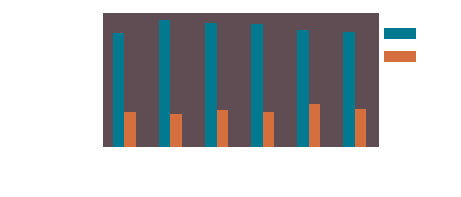

In [74]:
fig, all_axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 2.5))

colours = ['k', 'grey']
bar_width = 0.25

work_types = ["Full-Time", "Part-Time"]

for yidx, year in enumerate(earnings_data['Year'].unique()):
    interested_data = earnings_data.loc[
        (
            earnings_data['Sex'] == "All"
        ) & (
            earnings_data['HoursAndEarnings'] == "Annual pay - Gross"
        ) & (
            earnings_data['Geography'] == "Swindon"
        ) & (
            earnings_data['Year'] == year
        ) & (
            earnings_data['AveragesAndPercentiles'] == "Mean"
        )
    ] 
    
    # Get and plot Full-Time annual salary
    val = interested_data.loc[interested_data['WorkingPattern'] == work_types[0]][['Figure']].iloc[0][0]
    ft = all_axs.bar(
        year-(bar_width/2),
        val,
        color="#007991",
        width=bar_width,
        label="FT"
    )
    # Get and plot Full-Time annual salary
    val = interested_data.loc[interested_data['WorkingPattern'] == work_types[1]][['Figure']].iloc[0][0]
    pt = all_axs.bar(
        year+(bar_width/2),
        val,
        color="#D56F3E",
        width=bar_width,
        label="PT"
    )

yticks = np.arange(10000, 40001, 10000).tolist()
yticks2 = []
for ytck in yticks:
    yticks2.append("£{}".format(ytck))
all_axs.set_xticks(earnings_data['Year'].unique())
all_axs.set_xticklabels(earnings_data['Year'].unique(), fontsize=16, fontweight='bold')
all_axs.set_yticks(np.arange(10000, 40001, 10000))
all_axs.set_yticklabels(yticks2, fontsize=16, fontweight='bold')
all_axs.set_xlabel("Year", color='w', fontsize=16, fontweight='bold')
all_axs.set_ylim([0, 40000])
all_axs.set_ylabel("Annual Pay", color='w', fontsize=16, fontweight='bold')
#all_axs.set_xlim(1, 5)

leg = all_axs.legend([ft, pt], ["FT", "PT"],
           loc='upper right',
           framealpha=0,
           ncol=1,
           fontsize=16,
           bbox_to_anchor=[1.3, 1.]
          )
for text in leg.get_texts():
    plt.setp(text, color = 'w')
#["#007991", "#D56F3E"]
all_axs.set_facecolor("#604D53")
all_axs.spines['right'].set_color("#FFFFFF")
all_axs.spines['top'].set_color("#FFFFFF")
all_axs.spines['bottom'].set_color("#FFFFFF")
all_axs.spines['left'].set_color("#FFFFFF")
all_axs.spines['right'].set_linewidth(0)
all_axs.spines['top'].set_linewidth(0)
all_axs.spines['bottom'].set_linewidth(5)
all_axs.spines['left'].set_linewidth(5)
all_axs.tick_params(axis='x', colors='#FFFFFF', width=5)
all_axs.tick_params(axis='y', colors='#FFFFFF', width=5)

In [ ]:
fig, all_axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

colours = ['k', 'grey']
bar_width = 0.25

work_types = ["Full-Time", "Part-Time"]

for yidx, year in enumerate(earnings_data['Year'].unique()):
    interested_data = earnings_data.loc[
        (
            earnings_data['Sex'] == "All"
        ) & (
            earnings_data['HoursAndEarnings'] == "Annual pay - Gross"
        ) & (
            earnings_data['Geography'] == "Swindon"
        ) & (
            earnings_data['Year'] == year
        ) & (
            earnings_data['AveragesAndPercentiles'] == "Mean"
        )
    ] 
    
    # Get and plot Full-Time annual salary
    val = interested_data.loc[interested_data['WorkingPattern'] == work_types[0]][['Figure']].iloc[0][0]
    ft = all_axs.bar(
        year-(bar_width/2),
        val,
        color='k',
        width=bar_width,
        label="Full-Time"
    )
    
    # Get and plot Part-Time annual salary
    val = interested_data.loc[interested_data['WorkingPattern'] == work_types[1]][['Figure']].iloc[0][0]
    pt = all_axs.bar(
        year+(bar_width/2),
        val,
        color='grey',
        width=bar_width,
        label="Part-Time"
    )

all_axs.set_title("Gross Annual Earnings", fontsize=12)
all_axs.set_ylabel("Gross Annual Earnings (£)", fontsize=12)
all_axs.set_xticks(earnings_data['Year'].unique())
all_axs.set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
#all_axs.set_xlim(1, 5)

all_axs.legend([ft, pt], work_types, fontsize=12)

In [103]:
earnings_data

,Geography,AveragesAndPercentiles,Sex,WorkingPattern,HoursAndEarnings,Year,Figure
0,Swindon,Mean,All,All,Annual pay - Gross,2019,29584.00
1,Swindon,Mean,All,All,Hourly pay - Gross,2019,16.49
2,Swindon,Mean,All,All,Paid hours worked - Basic,2019,33.40
3,Swindon,Mean,All,All,Paid hours worked - Overtime,2019,1.10
4,Swindon,Mean,All,All,Paid hours worked - Total,2019,34.50
...,...,...,...,...,...,...,...
643,Swindon,Median,Male,Part-Time,Hourly pay - Gross,2014,7.72
644,Swindon,Median,Male,Part-Time,Paid hours worked - Basic,2014,18.40
645,Swindon,Median,Male,Part-Time,Paid hours worked - Overtime,2014,NaN
646,Swindon,Median,Male,Part-Time,Paid hours worked - Total,2014,19.40


In [105]:
earnings_data.loc[
        (
            earnings_data['Sex'] == "All"
        ) & (
            earnings_data['HoursAndEarnings'] == "Hourly pay - Gross"
        ) & (
            earnings_data['Geography'] == "Swindon"
        ) & (
            earnings_data['Year'] == 2014
        ) & (
            earnings_data['AveragesAndPercentiles'] == "Mean"
        )
    ] 

,Geography,AveragesAndPercentiles,Sex,WorkingPattern,HoursAndEarnings,Year,Figure
541,Swindon,Mean,All,All,Hourly pay - Gross,2014,15.41
547,Swindon,Mean,All,Full-Time,Hourly pay - Gross,2014,16.40
553,Swindon,Mean,All,Part-Time,Hourly pay - Gross,2014,10.17


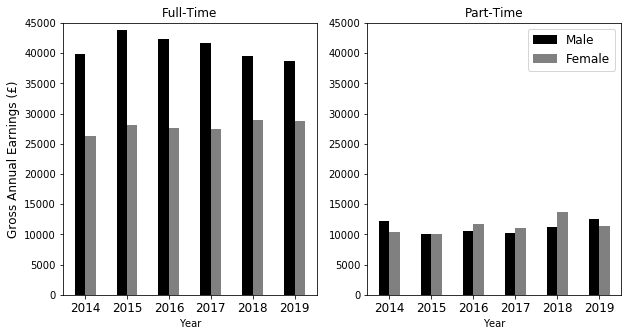

In [5]:
fig, all_axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

colours = ['k', 'grey']
bar_width = 0.25

sexes = ["Male", "Female"]
work_types = ["Full-Time", "Part-Time"]

for widx, work in enumerate(work_types):
    for yidx, year in enumerate(earnings_data['Year'].unique()):
        interested_data = earnings_data.loc[
            (
                earnings_data['WorkingPattern'] == work
            ) & (
                earnings_data['HoursAndEarnings'] == "Annual pay - Gross"
            ) & (
                earnings_data['Geography'] == "Swindon"
            ) & (
                earnings_data['Year'] == year
            ) & (
                earnings_data['AveragesAndPercentiles'] == "Mean"
            )
        ] 

        # Get and plot Full-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[0]][['Figure']].iloc[0][0]
        ft = all_axs[widx].bar(
            year-(bar_width/2),
            val,
            color='k',
            width=bar_width,
            label="Full-Time"
        )

        # Get and plot Part-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[1]][['Figure']].iloc[0][0]
        pt = all_axs[widx].bar(
            year+(bar_width/2),
            val,
            color='grey',
            width=bar_width,
            label="Part-Time"
        )

all_axs[0].set_title("Full-Time", fontsize=12)
all_axs[0].set_ylabel("Gross Annual Earnings (£)", fontsize=12)
all_axs[0].set_xticks(earnings_data['Year'].unique())
all_axs[0].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[0].set_ylim([0, 45000])
all_axs[0].set_xlabel("Year")

all_axs[1].set_title("Part-Time", fontsize=12)
all_axs[1].set_xticks(earnings_data['Year'].unique())
all_axs[1].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[1].set_ylim([0, 45000])
all_axs[1].set_xlabel("Year")
#all_axs.set_xlim(1, 5)

all_axs[widx].legend([ft, pt], sexes, fontsize=12, loc='upper right')

In [113]:
earnings_data.loc[
            (
                earnings_data['WorkingPattern'] == "Full-Time"
            ) & (
                earnings_data['HoursAndEarnings'] == "Annual pay - Gross"
            ) & (
                earnings_data['Geography'] == "Swindon"
            ) & (
                earnings_data['AveragesAndPercentiles'] == "Mean"
            ) & (
                earnings_data['Year'] == 2019
            )
        ] 

,Geography,AveragesAndPercentiles,Sex,WorkingPattern,HoursAndEarnings,Year,Figure
6,Swindon,Mean,All,Full-Time,Annual pay - Gross,2019,34453.0
24,Swindon,Mean,Female,Full-Time,Annual pay - Gross,2019,28738.0
42,Swindon,Mean,Male,Full-Time,Annual pay - Gross,2019,38770.0


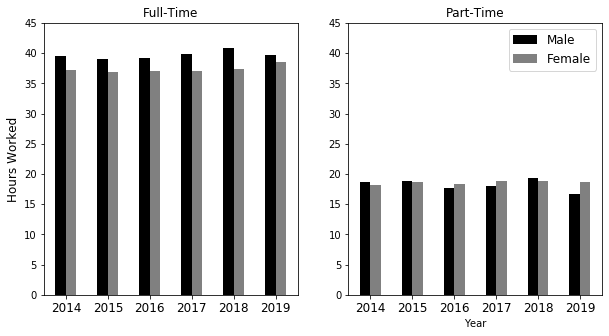

In [76]:
fig, all_axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

colours = ['k', 'grey']
bar_width = 0.25

sexes = ["Male", "Female"]
work_types = ["Full-Time", "Part-Time"]

for widx, work in enumerate(work_types):
    for yidx, year in enumerate(earnings_data['Year'].unique()):
        interested_data = earnings_data.loc[
            (
                earnings_data['WorkingPattern'] == work
            ) & (
                earnings_data['HoursAndEarnings'] == "Paid hours worked - Total"
            ) & (
                earnings_data['Geography'] == "Swindon"
            ) & (
                earnings_data['Year'] == year
            ) & (
                earnings_data['AveragesAndPercentiles'] == "Mean"
            )
        ] 

        # Get and plot Full-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[0]][['Figure']].iloc[0][0]
        ft = all_axs[widx].bar(
            year-(bar_width/2),
            val,
            color='k',
            width=bar_width,
            label="Full-Time"
        )

        # Get and plot Part-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[1]][['Figure']].iloc[0][0]
        pt = all_axs[widx].bar(
            year+(bar_width/2),
            val,
            color='grey',
            width=bar_width,
            label="Part-Time"
        )

all_axs[0].set_title("Full-Time", fontsize=12)
all_axs[0].set_ylabel("Hours Worked", fontsize=12)
all_axs[0].set_xticks(earnings_data['Year'].unique())
all_axs[0].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[0].set_ylim([0, 45])
all_axs[1].set_xlabel("Year")


all_axs[1].set_title("Part-Time", fontsize=12)
all_axs[1].set_xticks(earnings_data['Year'].unique())
all_axs[1].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[1].set_ylim([0, 45])
all_axs[1].set_xlabel("Year")
#all_axs.set_xlim(1, 5)

all_axs[widx].legend([ft, pt], sexes, fontsize=12, loc='upper right')

In [108]:
earnings_data.loc[
            (
                earnings_data['Sex'] == "All"
            ) & (
                earnings_data['HoursAndEarnings'] == "Paid hours worked - Total"
            ) & (
                earnings_data['Geography'] == "Swindon"
            ) & (
                earnings_data['Year'] == 2014
            ) & (
                earnings_data['AveragesAndPercentiles'] == "Mean"
            )
        ] 

,Geography,AveragesAndPercentiles,Sex,WorkingPattern,HoursAndEarnings,Year,Figure
544,Swindon,Mean,All,All,Paid hours worked - Total,2014,32.7
550,Swindon,Mean,All,Full-Time,Paid hours worked - Total,2014,38.6
556,Swindon,Mean,All,Part-Time,Paid hours worked - Total,2014,18.2


## Occupations Overview

Next, an overview of the occupations through time is given.

In [14]:
occupation_data.loc[occupation_data['Year'] == 2004]

,Position,Year,numerator,denominator,percent,conf
0,"Managers, directors and senior officials",2004,"9,900","97,800",10.1,2.2
1,Professional occupations,2004,"16,100","97,800",16.5,2.7
2,Associate prof & tech occupations,2004,"14,500","97,800",14.8,2.6
3,Administrative and secretarial occupations,2004,"16,100","97,800",16.4,2.7
4,Skilled trades occupations,2004,"9,000","97,800",9.2,2.1
5,"Caring, leisure and other service occupations",2004,"5,900","97,800",6.0,1.7
6,Sales and customer service occupations,2004,"8,600","97,800",8.8,2.0
7,"Process, plant and machine operatives",2004,"6,900","97,800",7.0,1.8
8,Elementary occupations,2004,"10,800","97,800",11.1,2.3


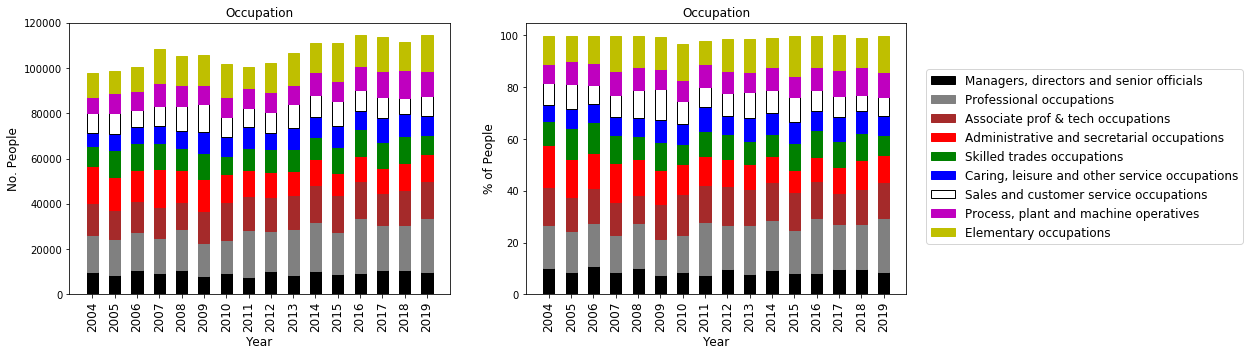

In [6]:
fig, all_axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

colours = ['k', 'grey', 'brown', 'r', 'g', 'b', 'w', 'm', 'y']
bar_width = 0.5

for yidx, year in enumerate(occupation_data['Year'].unique()):
    interested_data = occupation_data.loc[occupation_data['Year'] == year]
    bot_tot = 0
    bot_perc = 0
    bars = []
    for oidx, occupation in enumerate(interested_data['Position'].unique()):
        # Get value
        val = float(
            interested_data.loc[interested_data['Position'] == occupation][['numerator']].iloc[0][0].replace(',', ''))
        bars.append(all_axs[0].bar(
            year,
            val,
            color=colours[oidx],
            width=bar_width,
            bottom=bot_tot,
            label=occupation,
            edgecolor=colours[oidx] if colours[oidx] != 'w' else 'k',
            linewidth=1
        ))
        # Update position
        bot_tot = bot_tot + val
        
        # Get value
        val = float(
            interested_data.loc[interested_data['Position'] == occupation][['percent']].iloc[0][0])
        all_axs[1].bar(
            year,
            val,
            color=colours[oidx],
            width=bar_width,
            bottom=bot_perc,
            label=occupation,
            edgecolor=colours[oidx] if colours[oidx] != 'w' else 'k',
            linewidth=1
        )
        # Update position
        bot_perc = bot_perc + val

all_axs[0].set_xticks(occupation_data['Year'].unique())
all_axs[0].set_xticklabels(occupation_data['Year'].unique(), rotation=90, fontsize=12)
all_axs[0].set_title("Occupation", fontsize=12)
all_axs[0].set_ylabel("No. People", fontsize=12)
all_axs[0].set_xlabel("Year", fontsize=12)

all_axs[1].set_xticks(occupation_data['Year'].unique())
all_axs[1].set_xticklabels(occupation_data['Year'].unique(), rotation=90, fontsize=12)
all_axs[1].set_title("Occupation", fontsize=12)
all_axs[1].set_ylabel("% of People", fontsize=12)
all_axs[1].set_xlabel("Year", fontsize=12)

all_axs[0].legend(bars, interested_data['Position'].unique(), bbox_to_anchor=(3.1, 0.85), fontsize=12)

Managers, directors and senior officials:
   - Slope: 44.411764705882355
   - Intercept: -79734.26470588236
   - R-Value: 0.2022160229621065
   - P-Value: 0.4526150813983889
   - BEFORE: 9,900
   - AFTER: 10,000
   - CHANGE: 100
Professional occupations:
   - Slope: 491.61764705882354
   - Intercept: -970207.6470588235
   - R-Value: 0.772546436587207
   - P-Value: 0.0004515971074701778
   - BEFORE: 16,100
   - AFTER: 23,700
   - CHANGE: 7600
Associate prof & tech occupations:
   - Slope: 175.88235294117646
   - Intercept: -338987.35294117645
   - R-Value: 0.5923056988498465
   - P-Value: 0.015626184634597813
   - BEFORE: 14,500
   - AFTER: 16,300
   - CHANGE: 1800
Administrative and secretarial occupations:
   - Slope: -327.6470588235294
   - Intercept: 671649.5588235294
   - R-Value: -0.759128460138703
   - P-Value: 0.0006488377131039451
   - BEFORE: 16,100
   - AFTER: 11,900
   - CHANGE: -4200
Skilled trades occupations:
   - Slope: 8.676470588235293
   - Intercept: -6896.47058823529

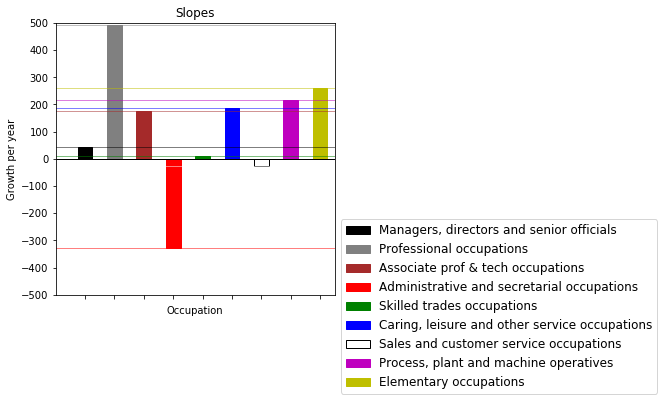

In [7]:
fig, all_axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

colours = ['k', 'grey', 'brown', 'r', 'g', 'b', 'w', 'm', 'y']
bar_width = 0.5

years = occupation_data['Year'].unique()
slopes = {}
for oidx, occupation in enumerate(occupation_data['Position'].unique()):
    gdata = occupation_data.loc[
        (occupation_data['Position'] == occupation)
    ]['numerator'].str.replace(',', '').values.astype(int)
    slope, inter, rval, pval, _ = linregress(years, gdata)
    slopes[occupation] = slope
    print("{}:".format(occupation))
    print("   - Slope: {}".format(slope))
    print("   - Intercept: {}".format(inter))
    print("   - R-Value: {}".format(rval))
    print("   - P-Value: {}".format(pval))
    print("   - BEFORE: {}".format(
        occupation_data.loc[
            (occupation_data['Position'] == occupation) &
            (occupation_data['Year'] == 2004)
        ]['numerator'].values[0])
    )
    print("   - AFTER: {}".format(
        occupation_data.loc[
            (occupation_data['Position'] == occupation) &
            (occupation_data['Year'] == 2019)
        ]['numerator'].values[0])
    )
    print("   - CHANGE: {}".format(
        int(occupation_data.loc[
            (occupation_data['Position'] == occupation) &
            (occupation_data['Year'] == 2019)
        ]['numerator'].str.replace(',', '').values[0]) - int(occupation_data.loc[
            (occupation_data['Position'] == occupation) &
            (occupation_data['Year'] == 2004)
        ]['numerator'].str.replace(',', '').values[0]))
    )
    all_axs.bar(
        oidx+1,
        slope,
        color=colours[oidx],
        edgecolor=colours[oidx] if colours[oidx] != 'w' else 'k',
        width=bar_width,
        label=occupation,
        linewidth=1
    )
    all_axs.plot(
        np.arange(0, 11),
        np.repeat(slope, 11),
        color=colours[oidx],
        linewidth=0.5
    )
all_axs.plot(np.arange(0, 11), np.zeros(11), c='k', linewidth=1)
all_axs.set_title("Slopes")
all_axs.set_xlabel("Occupation")
all_axs.set_ylabel("Growth per year")
all_axs.set_ylim([-450, 450])
all_axs.set_yticks(np.arange(-500, 501, 100))
all_axs.set_xlim([0, 9.5])
all_axs.set_xticks(range(1, 10))
all_axs.set_xticklabels([], rotation=90, fontsize=12)
all_axs.legend(bbox_to_anchor=(1, 0.3), fontsize=12)

Managers, directors and senior officials:
   - Slope: -0.04867647058823529
   - Intercept: 106.86897058823529
   - R-Value: -0.23268382530000387
   - P-Value: 0.38581616614788694
   - BEFORE: 10.1
   - AFTER: 8.7
   - CHANGE: -1.4000000000000004
Professional occupations:
   - Slope: 0.2839705882352941
   - Intercept: -553.850588235294
   - R-Value: 0.5942535766019458
   - P-Value: 0.01520317502191348
   - BEFORE: 16.5
   - AFTER: 20.6
   - CHANGE: 4.100000000000001
Associate prof & tech occupations:
   - Slope: 0.029705882352941127
   - Intercept: -45.940882352941074
   - R-Value: 0.12230480367244922
   - P-Value: 0.6518198654662146
   - BEFORE: 14.8
   - AFTER: 14.2
   - CHANGE: -0.6000000000000014
Administrative and secretarial occupations:
   - Slope: -0.423235294117647
   - Intercept: 863.1502941176469
   - R-Value: -0.8641504949384999
   - P-Value: 1.5867106091956037e-05
   - BEFORE: 16.4
   - AFTER: 10.4
   - CHANGE: -5.999999999999998
Skilled trades occupations:
   - Slope: -0.0

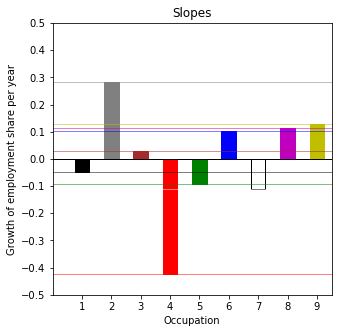

In [8]:
fig, all_axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

colours = ['k', 'grey', 'brown', 'r', 'g', 'b', 'w', 'm', 'y']
bar_width = 0.5

years = occupation_data['Year'].unique()
slopes = {}
for oidx, occupation in enumerate(occupation_data['Position'].unique()):
    gdata = occupation_data.loc[
        (occupation_data['Position'] == occupation)
    ]['percent'].values.astype(float)
    slope, inter, rval, pval, _ = linregress(years, gdata)
    slopes[occupation] = slope
    print("{}:".format(occupation))
    print("   - Slope: {}".format(slope))
    print("   - Intercept: {}".format(inter))
    print("   - R-Value: {}".format(rval))
    print("   - P-Value: {}".format(pval))
    print("   - BEFORE: {}".format(
        occupation_data.loc[
            (occupation_data['Position'] == occupation) &
            (occupation_data['Year'] == 2004)
        ]['percent'].values[0])
    )
    print("   - AFTER: {}".format(
        occupation_data.loc[
            (occupation_data['Position'] == occupation) &
            (occupation_data['Year'] == 2019)
        ]['percent'].values[0])
    )
    print("   - CHANGE: {}".format(
        occupation_data.loc[
            (occupation_data['Position'] == occupation) &
            (occupation_data['Year'] == 2019)
        ]['percent'].values[0] - occupation_data.loc[
            (occupation_data['Position'] == occupation) &
            (occupation_data['Year'] == 2004)
        ]['percent'].values[0])
    )
    all_axs.bar(
        oidx+1,
        slope,
        color=colours[oidx],
        edgecolor=colours[oidx] if colours[oidx] != 'w' else 'k',
        width=bar_width,
        label=occupation,
        linewidth=1
    )
    all_axs.plot(
        np.arange(0, 11),
        np.repeat(slope, 11),
        color=colours[oidx],
        linewidth=0.5
    )
all_axs.plot(np.arange(0, 11), np.zeros(11), c='k', linewidth=1)
all_axs.set_title("Slopes")
all_axs.set_xlabel("Occupation")
all_axs.set_ylabel("Growth of employment share per year")
all_axs.set_ylim([-0.5, 0.5])
all_axs.set_yticks(np.arange(-0.5, 0.6, 0.1))
all_axs.set_xlim([0, 9.5])
all_axs.set_xticks(range(1, 10))
#all_axs.set_xticklabels([], rotation=90, fontsize=12)
#all_axs.legend(bbox_to_anchor=(1, 0.3), fontsize=12)

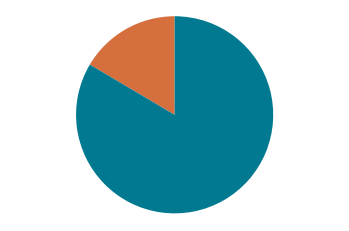

In [81]:
fig1, ax1 = plt.subplots()

labels = ["Male", "Female"]
ydata = activity_data.loc[activity_data['Year'] == 2019]
sizes = [
    16.5,
    100-(16.5),
]

ax1.pie(sizes, colors=["#D56F3E", "#007991"],
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

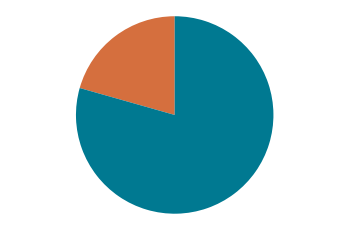

In [82]:
fig1, ax1 = plt.subplots()

labels = ["Male", "Female"]
ydata = activity_data.loc[activity_data['Year'] == 2019]
sizes = [
    20.6,
    100-(20.6),
]

ax1.pie(sizes, colors=["#D56F3E", "#007991"],
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Employment Activity

Next up is unemployment vs employment throughout this time period.

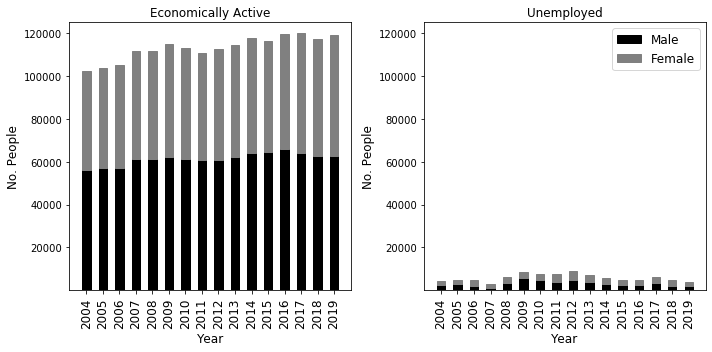

In [9]:
fig, all_axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

colours = ['k', 'grey', 'brown', 'r', 'g', 'b', 'w', 'm', 'y']
bar_width = 0.5
bars = []

for yidx, year in enumerate(activity_data['Year'].unique()):
    year_data = activity_data.loc[activity_data['Year'] == year]
    for tidx, typ in enumerate(["Economically Active", "Unemployed"]):
        bot = 0
        bars = []
        for gidx, gender in enumerate(["Male", "Female"]):
            gend_data = year_data.loc[year_data['Gender'] == gender]
            val = int(
                gend_data.loc[gend_data['Type'] == typ][['number']].iloc[0][0].replace(',', '')
            )
            bars.append(all_axs[tidx].bar(
                int(year),
                val,
                color=colours[gidx],
                width=bar_width,
                bottom=bot,
                label=gender,
                edgecolor=colours[gidx] if colours[gidx] != 'w' else 'k',
                linewidth=1
            ))
            bot = bot + val
            

all_axs[0].set_xticks(activity_data['Year'].unique())
all_axs[0].set_xticklabels(activity_data['Year'].unique(), rotation=90, fontsize=12)
all_axs[0].set_title("Economically Active", fontsize=12)
all_axs[0].set_ylabel("No. People", fontsize=12)
all_axs[0].set_xlabel("Year", fontsize=12)
all_axs[0].set_ylim([1, 125000])

all_axs[1].set_xticks(activity_data['Year'].unique())
all_axs[1].set_xticklabels(activity_data['Year'].unique(), rotation=90, fontsize=12)
all_axs[1].set_title("Unemployed", fontsize=12)
all_axs[1].set_ylabel("No. People", fontsize=12)
all_axs[1].set_xlabel("Year", fontsize=12)
all_axs[1].set_ylim([1, 125000])

all_axs[1].legend(bars, activity_data['Gender'].unique()[1:], fontsize=12)
plt.tight_layout()

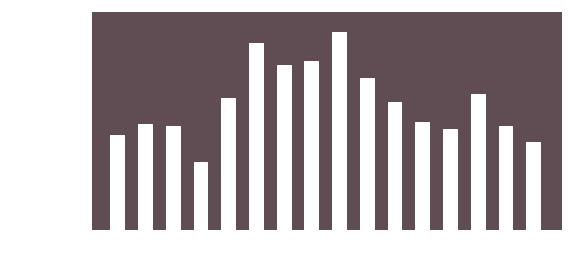

In [95]:
fig, all_axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

colours = ["#FFFFFF", "#007991", "#D56F3E"]
bar_width = 0.5
bars = []

for yidx, year in enumerate(activity_data['Year'].unique()):
    year_data = activity_data.loc[activity_data['Year'] == year]
    bot = 0
    bars = []
    for gidx, gender in enumerate(["All"]):
        gend_data = year_data.loc[year_data['Gender'] == gender]
        val = int(
            gend_data.loc[gend_data['Type'] == "Unemployed"][['number']].iloc[0][0].replace(',', '')
        )
        bars.append(all_axs.bar(
            int(year),
            val,
            color=colours[gidx],
            width=bar_width,
            bottom=bot,
            label=gender,
            edgecolor=colours[gidx] if colours[gidx] != 'w' else 'k',
            linewidth=1
        ))
        bot = bot + val
        
all_axs.set_xticks([2004, 2007, 2010, 2013, 2016, 2019])
all_axs.set_xticklabels([2004, 2007, 2010, 2013, 2016, 2019], fontsize=16, fontweight='bold')
all_axs.set_yticks(np.arange(0, 10001, 2500))
all_axs.set_yticklabels(np.arange(0, 10001, 2500), fontsize=16, fontweight='bold')
#all_axs.set_title("Unemployed", fontsize=12)
all_axs.set_ylabel("No. Unemployed People", color='w', fontsize=16, fontweight='bold')
all_axs.set_xlabel("Year", color='w', fontsize=16, fontweight='bold')
all_axs.set_ylim([1, 10000])


#all_axs.legend(bars, activity_data['Gender'].unique()[1:], fontsize=14)
plt.tight_layout()

all_axs.set_facecolor("#604D53")
all_axs.spines['right'].set_color("#FFFFFF")
all_axs.spines['top'].set_color("#FFFFFF")
all_axs.spines['bottom'].set_color("#FFFFFF")
all_axs.spines['left'].set_color("#FFFFFF")
all_axs.spines['right'].set_linewidth(0)
all_axs.spines['top'].set_linewidth(0)
all_axs.spines['bottom'].set_linewidth(5)
all_axs.spines['left'].set_linewidth(5)
all_axs.tick_params(axis='x', colors='#FFFFFF', width=5)
all_axs.tick_params(axis='y', colors='#FFFFFF', width=5)

In [28]:
activity_data.loc[activity_data['Year'] == 2019]

,Year,Type,Gender,number,conf
135,2019,All,All,"172,600","9,600"
136,2019,All,Male,"84,900","6,700"
137,2019,All,Female,"87,700","6,800"
138,2019,Economically Active,All,"118,900","7,900"
139,2019,Economically Active,Male,"62,500","5,800"
140,2019,Economically Active,Female,"56,400","5,500"
141,2019,Unemployed,All,"4,100","1,500"
142,2019,Unemployed,Male,"2,100","1,000"
143,2019,Unemployed,Female,"2,000","1,000"


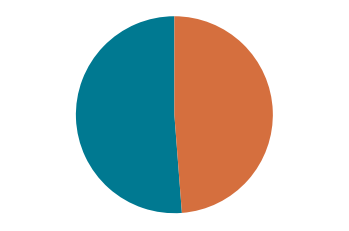

In [31]:
fig1, ax1 = plt.subplots()

labels = ["Male", "Female"]
ydata = activity_data.loc[activity_data['Year'] == 2019]
sizes = [
    16.4,
    16.5,
    ,
]

ax1.pie(sizes, colors=["#007991", "#D56F3E"],
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

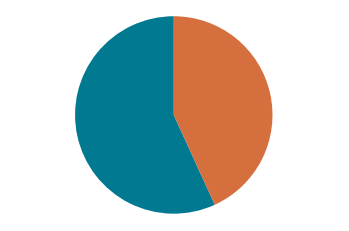

In [32]:
fig1, ax1 = plt.subplots()

labels = ["Male", "Female"]
ydata = activity_data.loc[activity_data['Year'] == 2004]
sizes = [
    int(ydata.loc[ydata['Gender'] == "Male"].loc[ydata['Type'] == "Unemployed"][['number']].iloc[0][0].replace(',', '')),
    int(ydata.loc[ydata['Gender'] == "Female"].loc[ydata['Type'] == "Unemployed"][['number']].iloc[0][0].replace(',', ''))
]

ax1.pie(sizes, colors=["#007991", "#D56F3E"],
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Regressions

Now let's take a look at the growth rates of the number of people in employment through time.

Economically Active (All):
   - Slope: 1045.8823529411766
   - Intercept: -1990654.8529411769
   - R-Value: 0.9050979121851846
   - P-Value: 1.4419920394064718e-06
Economically Active (Male):
   - Slope: 461.7647058823529
   - Intercept: -867302.2058823529
   - R-Value: 0.8146561073721086
   - P-Value: 0.00012152065422831925
Economically Active (Female):
   - Slope: 583.3823529411765
   - Intercept: -1121879.8529411764
   - R-Value: 0.9204162708303297
   - P-Value: 4.3842829731882067e-07
Unemployed (All):
   - Slope: 3.676470588235294
   - Intercept: -1501.4705882352937
   - R-Value: 0.010232714479339773
   - P-Value: 0.9699976489710923
Unemployed (Male):
   - Slope: -24.11764705882353
   - Intercept: 51675.14705882353
   - R-Value: -0.09388304367087325
   - P-Value: 0.7294667498738736
Unemployed (Female):
   - Slope: 30.441176470588236
   - Intercept: -58513.67647058824
   - R-Value: 0.2161374564676583
   - P-Value: 0.42140242191974653


(-50, 50)

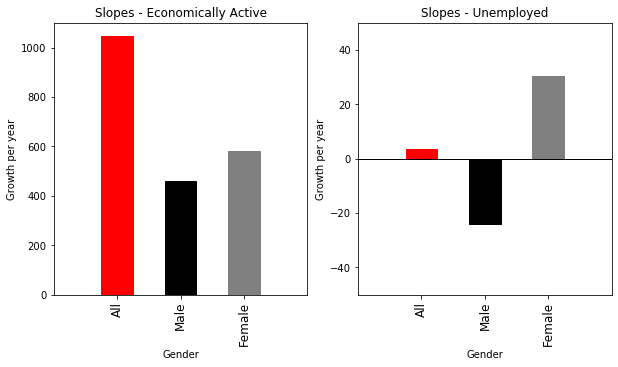

In [12]:
fig, all_axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

colours = ['red', 'k', 'grey']
bar_width = 0.5

years = activity_data['Year'].unique()

for tidx, typ in enumerate(["Economically Active", "Unemployed"]):
    for gidx, g in enumerate(["All", "Male", "Female"]):  
        gdata = activity_data.loc[
            (activity_data['Gender'] == g) &
            (activity_data['Type'] == typ)
        ]['number'].str.replace(',', '').values.astype(int)
        slope, inter, rval, pval, _ = linregress(years, gdata)
        print("{} ({}):".format(typ, g))
        print("   - Slope: {}".format(slope))
        print("   - Intercept: {}".format(inter))
        print("   - R-Value: {}".format(rval))
        print("   - P-Value: {}".format(pval))
        all_axs[tidx].bar(
            gidx+1,
            slope,
            color=colours[gidx],
            edgecolor=colours[gidx] if colours[gidx] != 'w' else 'k',
            width=bar_width,
            label=g,
            linewidth=1
        )
        #all_axs[tidx].plot(
        #    np.arange(0, 11),
        #    np.repeat(slope, 11),
        #    color=colours[oidx],
        #    linewidth=0.5
        #)
for tidx, typ in enumerate(["Economically Active", "Unemployed"]):
    all_axs[tidx].plot(np.arange(0, 11), np.zeros(11), c='k', linewidth=1)
    all_axs[tidx].set_title("Slopes - {}".format(typ))
    all_axs[tidx].set_xlabel("Gender")
    all_axs[tidx].set_ylabel("Growth per year")
    all_axs[tidx].set_xlim([0, 4])
    all_axs[tidx].set_xticks(range(1, 4))
    all_axs[tidx].set_xticklabels(["All", "Male", "Female"], rotation=90, fontsize=12)
all_axs[0].set_ylim([0, 1100])
all_axs[1].set_ylim([-50, 50])
#all_axs[1].legend(bbox_to_anchor=(1, 0.3), fontsize=12)

In [13]:
[['number']].iloc[0][0].replace(',', '')

.values[:, 0].tolist()

SyntaxError: invalid syntax (<ipython-input-13-61ff37d88e0c>, line 3)

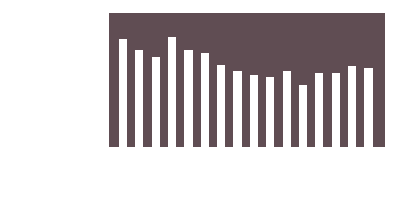

In [47]:
fig, all_axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 2.5))

colours = ['k', 'grey', 'brown', 'r', 'g', 'b', 'w', 'm', 'y']
bar_width = .5

for yidx, year in enumerate(occupation_data['Year'].unique()):
    interested_data = occupation_data.loc[occupation_data['Year'] == year]
    bars = []
    # Get value
    val = float(
        interested_data.loc[interested_data['Position'] == "Administrative and secretarial occupations"][['numerator']].iloc[0][0].replace(',', ''))
    bars.append(all_axs.bar(
        year,
        val,
        color="w",
        width=bar_width,
        label=occupation
    ))
    
    #val = float(
    #    interested_data.loc[interested_data['Position'] == "Professional occupations"][['numerator']].iloc[0][0].replace(',', ''))
    #bars.append(all_axs.bar(
    #    year+(bar_width/2),
    #    val,
    #    color="#D56F3E",
    #    width=bar_width,
    #    label=occupation
    #))

        
all_axs.set_xticks(np.arange(2004, 2020, 3))
all_axs.set_xticklabels(np.arange(2004, 2020, 3), fontsize=16, fontweight='bold')
all_axs.set_yticks(np.arange(5000, 20001, 5000))
all_axs.set_yticklabels(np.arange(5000, 20001, 5000), fontsize=16, fontweight='bold')
all_axs.set_xlabel("Year", color='w', fontsize=16, fontweight='bold')
all_axs.set_ylim([0, 20000])
all_axs.set_ylabel("No. People \n (Admin & Sec.)", color='w', fontsize=16, fontweight='bold')
#all_axs.set_xlim(1, 5)

#leg = all_axs.legend(bars, ["FT", "PT"],
#           loc='upper right',
#           framealpha=0,
#           ncol=1,
#           fontsize=16,
#           bbox_to_anchor=[1.3, 1.]
#          )
#for text in leg.get_texts():
#    plt.setp(text, color = 'w')
#["#007991", "#D56F3E"]
all_axs.set_facecolor("#604D53")
all_axs.spines['right'].set_color("#FFFFFF")
all_axs.spines['top'].set_color("#FFFFFF")
all_axs.spines['bottom'].set_color("#FFFFFF")
all_axs.spines['left'].set_color("#FFFFFF")
all_axs.spines['right'].set_linewidth(0)
all_axs.spines['top'].set_linewidth(0)
all_axs.spines['bottom'].set_linewidth(5)
all_axs.spines['left'].set_linewidth(5)
all_axs.tick_params(axis='x', colors='#FFFFFF', width=5)
all_axs.tick_params(axis='y', colors='#FFFFFF', width=5)


In [49]:
interested_data = occupation_data.loc[occupation_data['Year'] == 2019]

In [53]:
occu

'Professional'

1800.0
2600.0
3900.0
5000.0


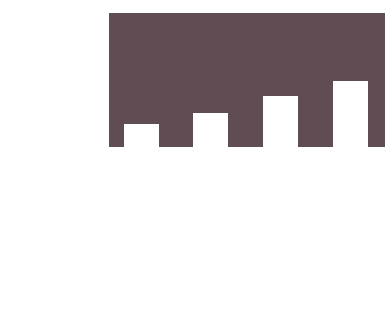

In [75]:
fig, all_axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 2.5))

colours = ['k', 'grey', 'brown', 'r', 'g', 'b', 'w', 'm', 'y']
bar_width = .5


for oidx, occu in enumerate(["Associate prof & tech occupations", "Caring, leisure and other service occupations", "Process, plant and machine operatives", "Elementary occupations"]):
    interested_data = occupation_data.loc[occupation_data['Year'] == 2019]
    val19 = float(
        interested_data.loc[interested_data['Position'] == occu][['numerator']].iloc[0][0].replace(',', ''))
    interested_data = occupation_data.loc[occupation_data['Year'] == 2004]
    val04 = float(
        interested_data.loc[interested_data['Position'] == occu][['numerator']].iloc[0][0].replace(',', ''))
    bars.append(all_axs.bar(
        oidx+1,
        val19-val04,
        color="w",
        width=bar_width,
        label=occu
    ))
    print(val19-val04)

        
all_axs.set_xticks(np.arange(1, 5.5, 1))
all_axs.set_xticklabels(
    [
        "Associate\nprof & tech",
        "Caring, leisure\nand other services",
        "Process, plant\nand machine \noperatives",
        "Elementary"
    ],
    fontsize=16, rotation=90, fontweight='bold')
all_axs.set_yticks(np.arange(2000, 10001, 2000))
all_axs.set_yticklabels(np.arange(2000, 10001, 2000), fontsize=16, fontweight='bold')
all_axs.set_ylim([0, 10000])
all_axs.set_ylabel("Increase in\n No. Employees", color='w', fontsize=16, fontweight='bold')
all_axs.set_xlim(0.5, 4.5)

#leg = all_axs.legend(bars, ["FT", "PT"],
#           loc='upper right',
#           framealpha=0,
#           ncol=1,
#           fontsize=16,
#           bbox_to_anchor=[1.3, 1.]
#          )
#for text in leg.get_texts():
#    plt.setp(text, color = 'w')
#["#007991", "#D56F3E"]
all_axs.set_facecolor("#604D53")
all_axs.spines['right'].set_color("#FFFFFF")
all_axs.spines['top'].set_color("#FFFFFF")
all_axs.spines['bottom'].set_color("#FFFFFF")
all_axs.spines['left'].set_color("#FFFFFF")
all_axs.spines['right'].set_linewidth(0)
all_axs.spines['top'].set_linewidth(0)
all_axs.spines['bottom'].set_linewidth(5)
all_axs.spines['left'].set_linewidth(5)
all_axs.tick_params(axis='x', colors='#FFFFFF', width=5)
all_axs.tick_params(axis='y', colors='#FFFFFF', width=5)


In [ ]:
fig, all_axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 2.5))

colours = ['k', 'grey']
bar_width = 0.25

work_types = ["Full-Time", "Part-Time"]

for yidx, year in enumerate(earnings_data['Year'].unique()):
    interested_data = earnings_data.loc[
        (
            earnings_data['Sex'] == "All"
        ) & (
            earnings_data['HoursAndEarnings'] == "Annual pay - Gross"
        ) & (
            earnings_data['Geography'] == "Swindon"
        ) & (
            earnings_data['Year'] == year
        ) & (
            earnings_data['AveragesAndPercentiles'] == "Mean"
        )
    ] 
    
    # Get and plot Full-Time annual salary
    val = interested_data.loc[interested_data['WorkingPattern'] == work_types[0]][['Figure']].iloc[0][0]
    ft = all_axs.bar(
        year-(bar_width/2),
        val,
        color="#007991",
        width=bar_width,
        label="FT"
    )
    # Get and plot Full-Time annual salary
    val = interested_data.loc[interested_data['WorkingPattern'] == work_types[1]][['Figure']].iloc[0][0]
    pt = all_axs.bar(
        year+(bar_width/2),
        val,
        color="#D56F3E",
        width=bar_width,
        label="PT"
    )

yticks = np.arange(10000, 40001, 10000).tolist()
yticks2 = []
for ytck in yticks:
    yticks2.append("£{}".format(ytck))
all_axs.set_xticks(earnings_data['Year'].unique())
all_axs.set_xticklabels(earnings_data['Year'].unique(), fontsize=16, fontweight='bold')
all_axs.set_yticks(np.arange(10000, 40001, 10000))
all_axs.set_yticklabels(yticks2, fontsize=16, fontweight='bold')
all_axs.set_xlabel("Year", color='w', fontsize=16, fontweight='bold')
all_axs.set_ylim([0, 40000])
all_axs.set_ylabel("Annual Pay", color='w', fontsize=16, fontweight='bold')
#all_axs.set_xlim(1, 5)

leg = all_axs.legend([ft, pt], ["FT", "PT"],
           loc='upper right',
           framealpha=0,
           ncol=1,
           fontsize=16,
           bbox_to_anchor=[1.3, 1.]
          )
for text in leg.get_texts():
    plt.setp(text, color = 'w')
#["#007991", "#D56F3E"]
all_axs.set_facecolor("#604D53")
all_axs.spines['right'].set_color("#FFFFFF")
all_axs.spines['top'].set_color("#FFFFFF")
all_axs.spines['bottom'].set_color("#FFFFFF")
all_axs.spines['left'].set_color("#FFFFFF")
all_axs.spines['right'].set_linewidth(0)
all_axs.spines['top'].set_linewidth(0)
all_axs.spines['bottom'].set_linewidth(5)
all_axs.spines['left'].set_linewidth(5)
all_axs.tick_params(axis='x', colors='#FFFFFF', width=5)
all_axs.tick_params(axis='y', colors='#FFFFFF', width=5)